# Step 0: Import Libraries

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Dataset

In [107]:
df = pd.read_csv('Space_Corrected.csv') #You need to change #directory accordingly
df.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [108]:
df.shape

(4324, 9)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [110]:
df=df.drop(['Unnamed: 0', 'Unnamed: 0.1'] , axis=1)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [111]:
df.describe()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [112]:
# Step 2: Clean Dataset

In [113]:
df.columns

Index(['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       ' Rocket', 'Status Mission'],
      dtype='object')

In [114]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
df.columns

Index(['company_name', 'location', 'datum', 'detail', 'status_rocket',
       'rocket', 'status_mission'],
      dtype='object')

In [115]:
#Check Types
df.dtypes

company_name      object
location          object
datum             object
detail            object
status_rocket     object
rocket            object
status_mission    object
dtype: object

In [116]:
#Check Missing 
df.isna().sum()

company_name         0
location             0
datum                0
detail               0
status_rocket        0
rocket            3360
status_mission       0
dtype: int64

In [117]:
#Double check for missing
df.replace(["#", "*", 'NA', 'N/A', '?', ' '], np.nan).isna().sum()

company_name         0
location             0
datum                0
detail               0
status_rocket        0
rocket            3360
status_mission       0
dtype: int64

In [118]:
#Check for Duplicates
df.duplicated().sum()

1

In [119]:
#Check Purpose (######)             
df.value_counts()

company_name  location                                                   datum                       detail                                      status_rocket  rocket  status_mission
CASC          Site 9401 (SLS-2), Jiuquan Satellite Launch Center, China  Wed Nov 05, 2008 00:15 UTC  Long March 2D | Shiyan-3 & Chuangxin-1(02)  StatusActive   29.75   Success           2
Arianespace   ELA-3, Guiana Space Centre, French Guiana, France          Fri Apr 18, 2008 22:17 UTC  Ariane 5 ECA | Star One C2 & Vinasat-1      StatusActive   200.0   Success           1
Northrop      Stargazer, Vandenberg AFB, California, USA                 Mon Jun 27, 1994 21:15 UTC  Pegasus XL | STEP-1                         StatusActive   40.0    Failure           1
              Stargazer, Cape Canaveral AFS, Florida, USA                Thu Oct 22, 1998 00:02 UTC  Pegasus | SCD-2                             StatusRetired  40.0    Success           1
                                                                 

# Step 3: EDA

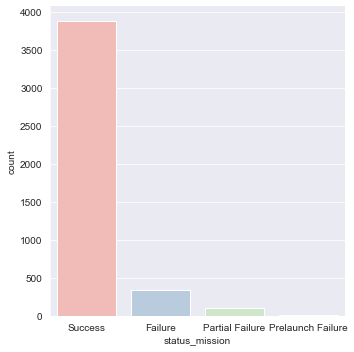

In [120]:
#Status Mission
sns.set_style('darkgrid')
sns.catplot(x = 'status_mission',
            data = df,
            order=df.status_mission.value_counts().index,
            kind='count', 
            palette = 'Pastel1')

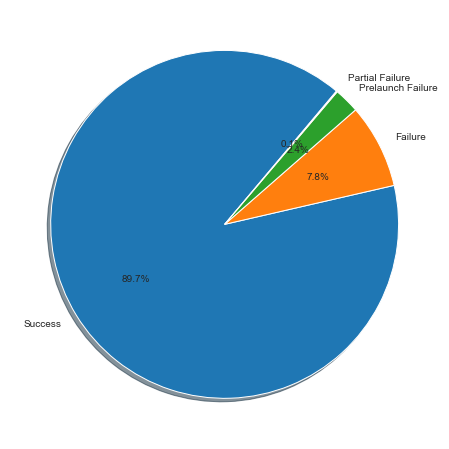

In [121]:
figure = plt.figure(figsize = (15,8))
sizes = df.status_mission.value_counts()
plt.pie(sizes, 
        labels=df.status_mission.unique(), 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=50);

In [122]:
#Each Companies Launches
ds = df.company_name.value_counts().reset_index()
ds

,index,company_name
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


# Step 4: Modeling

# Step 4.1: Preprocessing

In [123]:
from sklearn.model_selection import train_test_split


In [124]:
# Create X & Y

X = df.drop(columns = ['company_name','rocket']) 
y = df['status_mission']

X = pd.get_dummies(X, drop_first = True)
y = pd.get_dummies(y, drop_first = True)

#Split Data into Train vs Test 

X_train , X_test, y_train, y_test = train_test_split(X, 
                                                     y, 
                                                     test_size = 0.3, 
                                                     random_state = 42)

In [125]:
X_train.shape

(3026, 8735)

In [126]:
X_test.shape

(1298, 8735)

# Step 4.2: Different Models

# 1. Linear Regression

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

linrear_model = LinearRegression()
linrear_model.fit(X, y)
linrear_model_prediction = linrear_model.predict(X_test)
linrear_model_prediction

array([[-1.02348685e-16, -8.67361738e-19,  1.00000000e+00],
       [-1.87350135e-16, -9.45424294e-17,  1.00000000e+00],
       [-9.88792381e-17, -3.81639165e-17,  1.00000000e+00],
       ...,
       [ 2.03830008e-16,  1.50053581e-16,  1.00000000e+00],
       [-2.15973073e-16,  4.33680869e-17,  1.00000000e+00],
       [ 5.39499001e-16, -2.16840434e-17,  1.00000000e+00]])

In [128]:
round(linrear_model.score(X, y) * 100)

100

# 2. KNN Classifier

In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


knn = KNeighborsClassifier(n_neighbors = 5 )
knn.fit(X_train, y_train)
knn_model_prediction = knn.predict(X_test)
knn_model_prediction

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [133]:
round(metrics.accuracy_score(y_test, knn_model_prediction) * 100)

96

# Step 5: Conclusion

- Rocket column(cost of the mission) has many null values.
- There are one duplicate value.
- The bar chart shows that the majority of mission status is 'Successful'. 

- Models:

    1) The linear regression score = 100% which seems not realistic because of the occurance of too many  null values.

    ** Failed to get the following output (not sure why):
    #confusion_matrix(y_test,linrear_model_prediction)
    #classification_report(y_test,linrear_model_prediction)

    2) KNN Classifier score = 96%
